## Property Investment Decision

Flipping Houses?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

### Preparing

In [2]:
df  = pd.read_csv('data/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

*Narrowing down the columns based on the Project 2 suggestions if you're feeling overwhelmed.*

In [5]:
# Checking the data
data  = df[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built']]
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004


In [6]:
# Usually checking the info first
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  float64
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [7]:
# Check data missing
data.isnull().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [8]:
data['waterfront'].unique()

array([nan,  0.,  1.])

In [9]:
# It seems like it's a categorical that answers if the proerty is waterfront or not
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [10]:
# So filling NA as 0 and converting 'waterfront' to an integer as decimals are unnecessary
data['waterfront'] = data['waterfront'].fillna(0).astype(int)

In [11]:
# Checking duplicates
data[data.duplicated(keep=False, subset=['id'])]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
93,6021501535,430000.0,3,1.50,1580,5000,1.0,0,3,8,1939
94,6021501535,700000.0,3,1.50,1580,5000,1.0,0,3,8,1939
313,4139480200,1380000.0,4,3.25,4290,12103,1.0,0,3,11,1997
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,0,3,11,1997
324,7520000520,232000.0,2,1.00,1240,12092,1.0,0,3,6,1922
...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,502000.0,4,2.50,2680,5539,2.0,0,3,8,2013
20763,6300000226,240000.0,4,1.00,1200,2171,1.5,0,3,7,1933
20764,6300000226,380000.0,4,1.00,1200,2171,1.5,0,3,7,1933
21564,7853420110,594866.0,3,3.00,2780,6000,2.0,0,3,9,2013


In [12]:
# Removing duplicates and retaining the first row for each duplicate entry.
data = data.drop_duplicates(keep='first', subset=['id'])

In [13]:
# making ID as index
data.set_index('id', drop=True, append=False, inplace=True)
data.index.name = None

In [14]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,1955
6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,1951
5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,1933
2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,1965
1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,0,3,8,2009
6600060120,400000.0,4,2.50,2310,5813,2.0,0,3,8,2014
1523300141,402101.0,2,0.75,1020,1350,2.0,0,3,7,2009
291310100,400000.0,3,2.50,1600,2388,2.0,0,3,8,2004


In [15]:
data.shape

(21420, 10)

In [16]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,3.410784,7.662792,1971.092997
std,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.650035,1.171971,29.387141
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1952.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


Noticed a weird number in the bedrooms column

In [17]:
# Checking
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [18]:
# Noticed a different number which is 33, checking details
data[data['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
2402100895,640000.0,33,1.75,1620,6000,1.0,0,5,7,1947


In [19]:
# One house has 33 bedrooms and sqft_living of 1620. This is below the mean
# It is unlikely this house has 33 bedrooms, possibly a recording error
data['bedrooms'] = data['bedrooms'].replace(33, 3)

In [20]:
# Rechecking
data[data['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built


**Continues vs Categorical**

In [21]:
data.nunique()

price          3607
bedrooms         11
bathrooms        29
sqft_living    1034
sqft_lot       9776
floors            6
waterfront        2
condition         5
grade            11
yr_built        116
dtype: int64

Seems like we have the following in:

Continues variables:
- price
- sqft_living
- sqft_lot

Categorical variables:
- bedrooms
- bathrooms
- floors
- waterfront
- condition
- grade
- yr_built

In [22]:
# I feel like bathrooms has too much categories, checking
data['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [23]:
# narrowing it down to whole numbers
data['bathrooms'] = data['bathrooms'].round().astype(int)

In [24]:
data['bathrooms'].unique()

array([1, 2, 3, 4, 5, 6, 0, 7, 8])

In [25]:
# Same as the yr_built, checking
unique_years = data['yr_built'].unique()
np.sort(unique_years)

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015])

In [26]:
# Narrowing it down to a 3 bins categorised by half century
# Convert yr_built;
# 1900 to 1950 = yr_1900-1950
# 1951 to 2000 = yr_1951-1900
# 2001 to 2015 = yr_2001-2015

def half_cent(year):
    if 1899 < year < 1951:
        return 1
    elif 1950 < year < 2000:
        return 2
    else: return 3

In [27]:
data['yr_built'] = data['yr_built'].apply(half_cent)

In [28]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
7129300520,221900.0,3,1,1180,5650,1.0,0,3,7,2
6414100192,538000.0,3,2,2570,7242,2.0,0,3,7,2
5631500400,180000.0,2,1,770,10000,1.0,0,3,6,1
2487200875,604000.0,4,3,1960,5000,1.0,0,5,7,2
1954400510,510000.0,3,2,1680,8080,1.0,0,3,8,2
...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2,1530,1131,3.0,0,3,8,3
6600060120,400000.0,4,2,2310,5813,2.0,0,3,8,3
1523300141,402101.0,2,1,1020,1350,2.0,0,3,7,3
291310100,400000.0,3,2,1600,2388,2.0,0,3,8,3


Seems like I am okay with my EDA, Let's do our base model now

## Iteration 1 (Base Model)

In [29]:
# Creating new df to avoid messing with the original one
base = data.copy()

In [30]:
base.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

In [31]:
ols_formula = 'price ~ sqft_living + sqft_lot + C(bedrooms) + C(bathrooms) + C(floors) + C(waterfront) + C(condition)+ C(grade)+ C(yr_built)'
OLS = ols(formula = ols_formula, data = base)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1055.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:03:18   Log-Likelihood:            -2.9288e+05
No. Observations:               21420   AIC:                         5.859e+05
Df Residuals:                   21377   BIC:                         5.862e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -1.02e+04   2.39e+05     -0.043      0.966   -4.78e+05    4.57e+05
C(bedrooms)[T.2]     160.1036   1.61e+04      0.010      0.992   -3.15e+04    3.18e+04
C(bedrooms)[T.3]   -2.541e+04   1.62e+04     -1.570      0.116   -5.71e+04    6312.721
C(bedrooms)[T.4]   -5.558e+04   1.65e+04     -3.365      0.001    -8.8e+04   -2.32e+04
C(bedrooms)[T.5]   -4.413e+04   1.74e+04     -2.534      0.011   -7.83e+04   -9992.402
C(bedrooms)[T.6]   -7.873e+04   2.13e+04     -3.704      0.000    -1.2e+05   -3.71e+04
C(bedrooms)[T.7]   -1.592e+05   3.87e+04     -4.118      0.000   -2.35e+05   -8.34e+04
C(bedrooms)[T.8]    7.975e+04   6.13e+04      1.301      0.193   -4.04e+04       2e+05
C(bedrooms)[T.9]    -3.92e+05   8.97e+04     -4.369      0.000   -5.68e+05   -2.16e+05
C(bedrooms)[T.10]  -1.277e+05   1.23e+05     -1.039      0.299   -3.69e+05    1.13e+05
C(bedrooms)[T.11]  -2.205e+05   2.11e+05     -1.046      0.296   -6.34e+05    1.93e+05
C(bathrooms)[T.1]   1.015e+05   1.05e+05      0.964      0.335   -1.05e+05    3.08e+05
C(bathrooms)[T.2]   1.018e+05   1.05e+05      0.967      0.334   -1.05e+05    3.08e+05
C(bathrooms)[T.3]   1.399e+05   1.05e+05      1.328      0.184   -6.66e+04    3.46e+05
C(bathrooms)[T.4]    1.97e+05   1.06e+05      1.867      0.062   -9874.686    4.04e+05
C(bathrooms)[T.5]   4.679e+05   1.09e+05      4.280      0.000    2.54e+05    6.82e+05
C(bathrooms)[T.6]   6.029e+05   1.15e+05      5.231      0.000    3.77e+05    8.29e+05
C(bathrooms)[T.7]   3.007e+05   1.84e+05      1.633      0.102   -6.02e+04    6.62e+05
C(bathrooms)[T.8]   1.677e+06   1.56e+05     10.770      0.000    1.37e+06    1.98e+06
C(floors)[T.1.5]      82.1918   5745.483      0.014      0.989   -1.12e+04    1.13e+04
C(floors)[T.2.0]   -3.364e+04   4111.401     -8.183      0.000   -4.17e+04   -2.56e+04
C(floors)[T.2.5]     9.62e+04   1.71e+04      5.615      0.000    6.26e+04     1.3e+05
C(floors)[T.3.0]    6.334e+04   9774.576      6.480      0.000    4.42e+04    8.25e+04
C(floors)[T.3.5]    1.282e+05   8.01e+04      1.601      0.109   -2.87e+04    2.85e+05
C(waterfront)[T.1]  7.472e+05   1.77e+04     42.165      0.000    7.12e+05    7.82e+05
C(condition)[T.2]  -1.856e+04   4.31e+04     -0.430      0.667   -1.03e+05     6.6e+04
C(condition)[T.3]   7051.9866      4e+04      0.176      0.860   -7.14e+04    8.55e+04
C(condition)[T.4]   4.625e+04   4.01e+04      1.154      0.248   -3.23e+04    1.25e+05
C(condition)[T.5]   9.562e+04   4.03e+04      2.373      0.018    1.66e+04    1.75e+05
C(grade)[T.4]       1.758e+04   2.14e+05      0.082      0.935   -4.02e+05    4.38e+05
C(grade)[T.5]       1.051e+04   2.11e+05      0.050      0.960   -4.03e+05    4.24e+05
C(grade)[T.6]       6.928e+04   2.11e+05      0.329      0.742   -3.44e+05    4.82e+05
C(grade)[T.7]        1.84e+05   2.11e+

 - **Skew**  = 1.866 indicates the model is positively skewed

 - **Kurtosis** = 20.917 suggests that the residuals in the OLS regression model have heavy tails, which can have implications for the validity of the model's assumptions and the reliability of its results. Further investigation and potentially some adjustments to the model or data preprocessing may be necessary to address this issue and improve the model's performance.
 
Also, the R-squared and Adjusted R-squared values are very close to each other, indicating that the inclusion of independent variables in the model does not significantly affect the model's explanatory power. This suggests that the independent variables included in the model are collectively explaining a substantial portion (about 67.4% to 67.5%) of the variance in the dependent variable.

We will address these issues while working to improve our R-squared and Adjusted R-squared values.

### Distribution and KDE

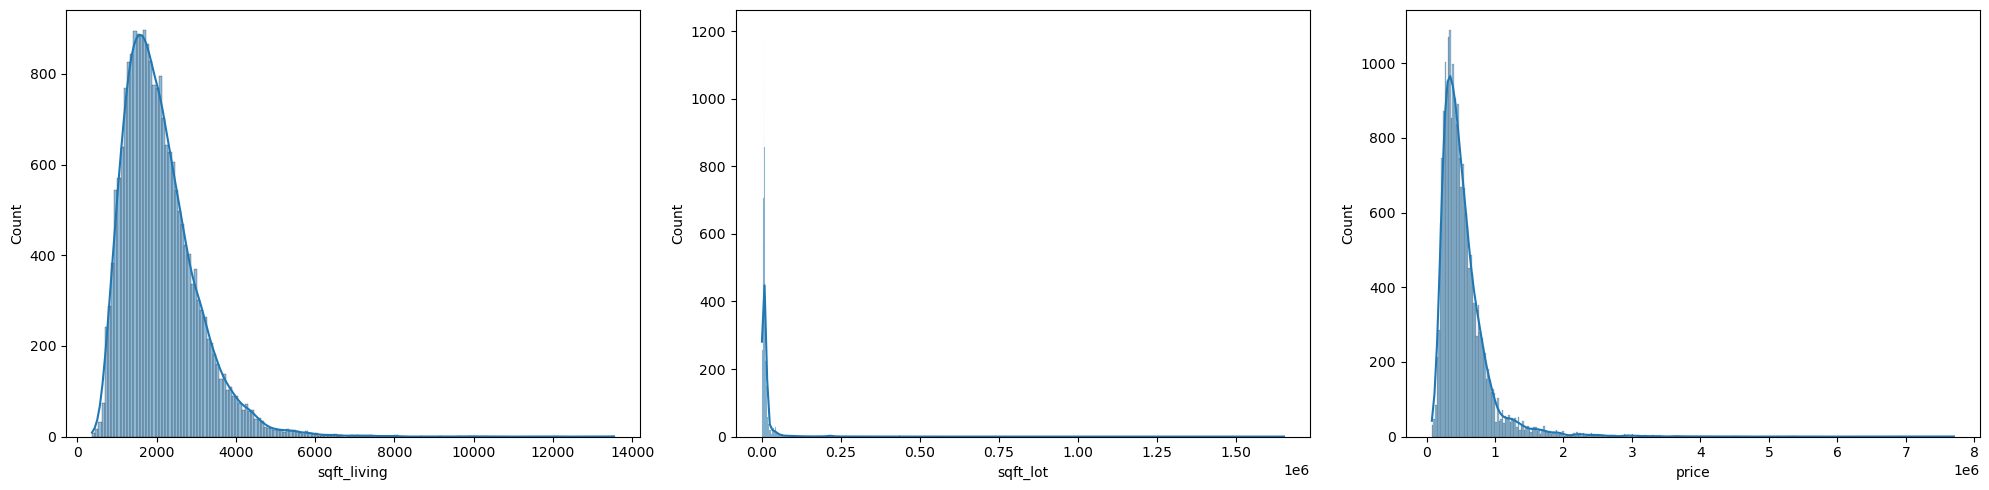

In [32]:
fig, axes = plt.subplots(1, 3, figsize = (20,5))
columns = ['sqft_living', 'sqft_lot','price']

sns.histplot(data=base, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=base, x="sqft_lot", kde=True, ax=axes[1])
sns.histplot(data=base, x="price", kde=True, ax=axes[2])

plt.tight_layout()
plt.show()

### Distribution and KDE comments

Normal distribution with positive skew

- price
- sqft_living
- sqft_lot

Positive skewness means that the tails of the distributions for these variables are longer on the right side (toward higher values), and most of the data points are concentrated on the left side (toward lower values).

### Model assumption: Linearity

Identify which variables have a linear relationship with the target variable price

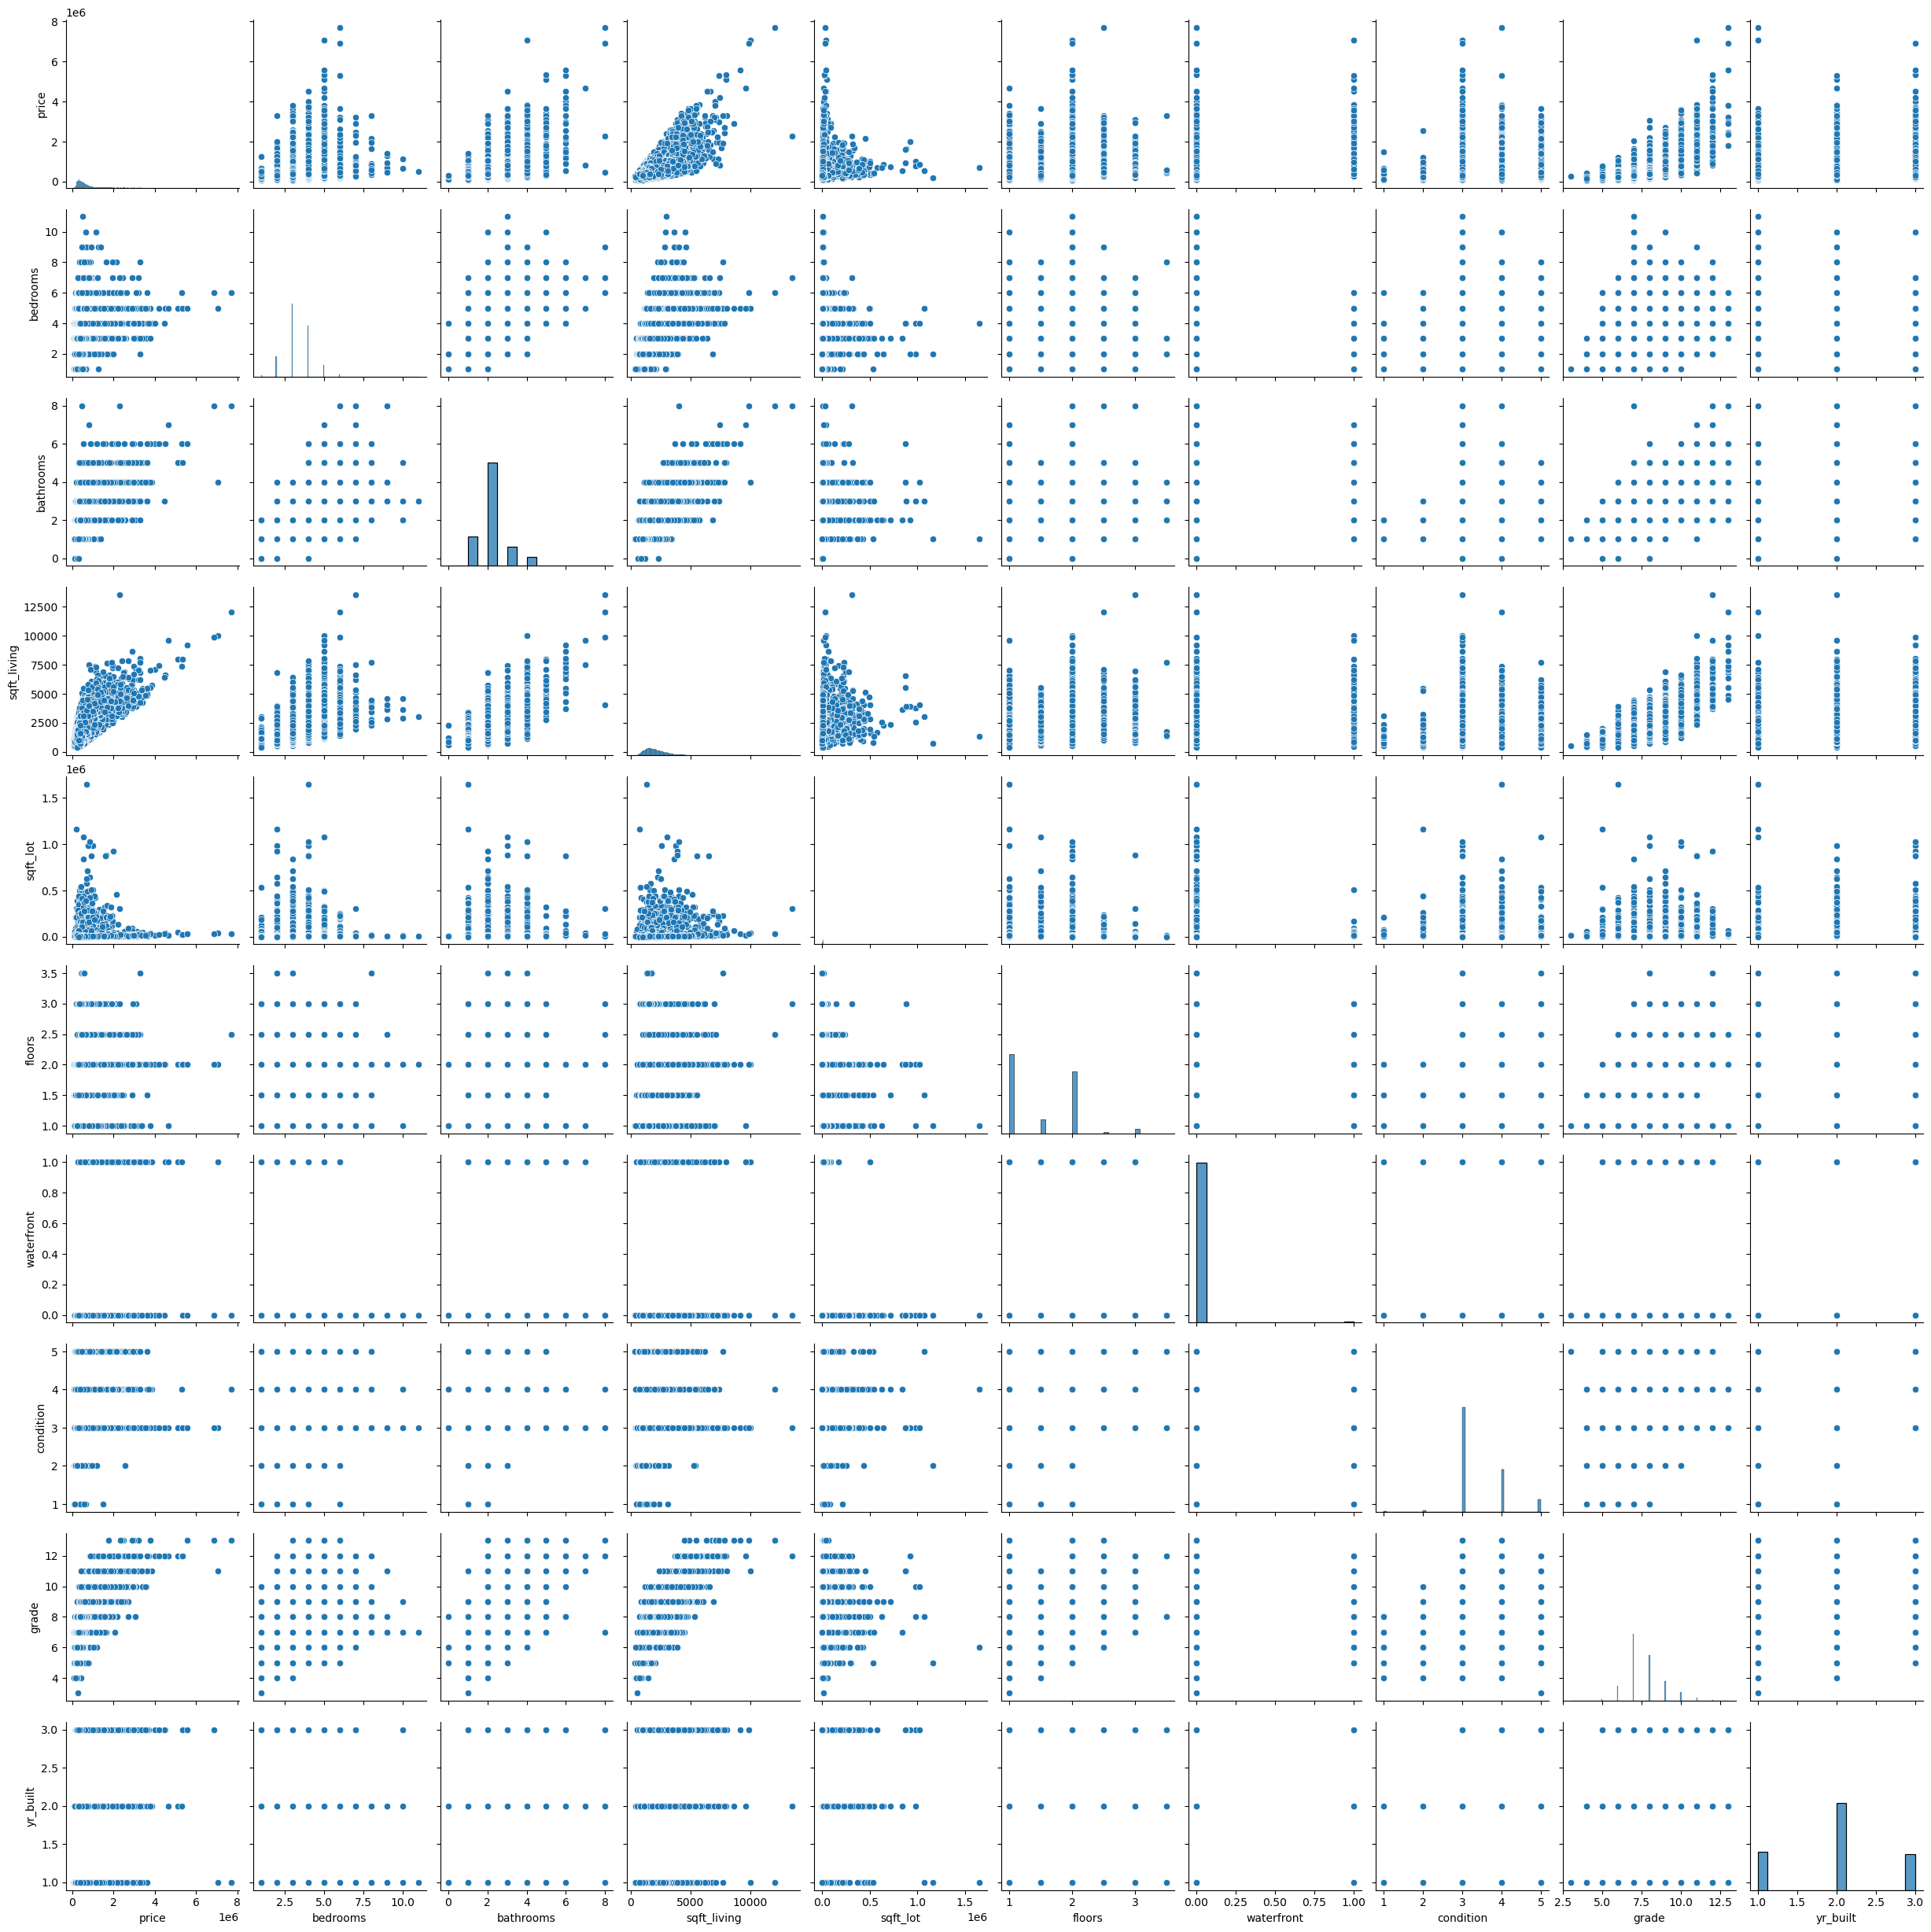

In [33]:
sns.pairplot(base);

### Linearity Comments

Confirmed as categorical data.
* bedroom
* bathroom
* floors
* waterfront
* condition
* grade
* yr_built

Variables that have a strong linear relationship with price.
* sqft_living

Variables that have a weak linear relationship with price.
* sqft_lot

### Model assumption: Normality

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

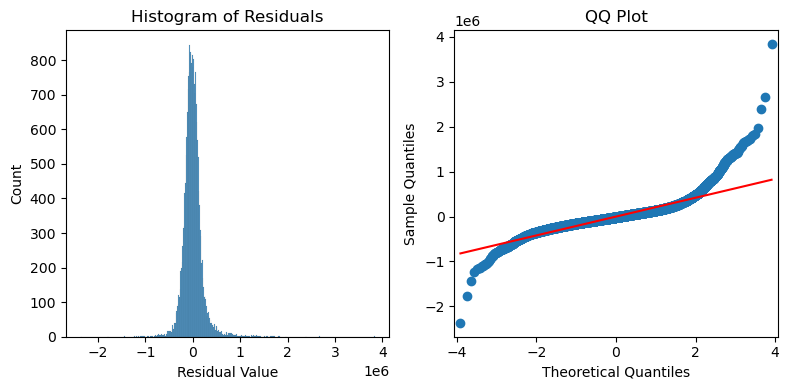

In [34]:
# Calculate the residuals.
residuals = model.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("QQ Plot")

plt.tight_layout()
plt.show()

- I believe the histogram exhibits a slight positive skew. And heavier tails than the normal distribution
- The residuals in the Q-Q plot appear to form an almost straight line. Largest values are larger (more extreme) than would be expected. Will check outliers as well

We will make some adjustments to improve these results.

### Model assumption: Constant variance

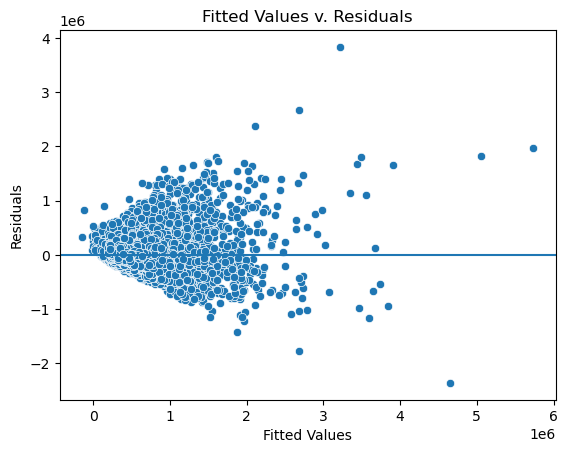

In [35]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)

plt.show()

The variance of the residuals increases with X, indicating a violation of the constant variance assumption.

One potential solution to address this issue is to consider weighted regression, which can account for the changing variance. It's evident that the assumptions of the model may not hold under these circumstances.

### Model assumption: No multicollinearity

In [36]:
# Calculate the variance inflation factor (optional).

# variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# subset of the data with the continous independent variables. 
X = base[['sqft_living','sqft_lot']]

# variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
sqft_living,1.167323
sqft_lot,1.167323


Given that both "sqft_living" and "sqft_lot" have VIF values close to 1, it suggests that they are not highly correlated with each other or with other predictor variables in your regression model. This is a positive finding, as it indicates that multicollinearity is not a significant concern for these particular variables.

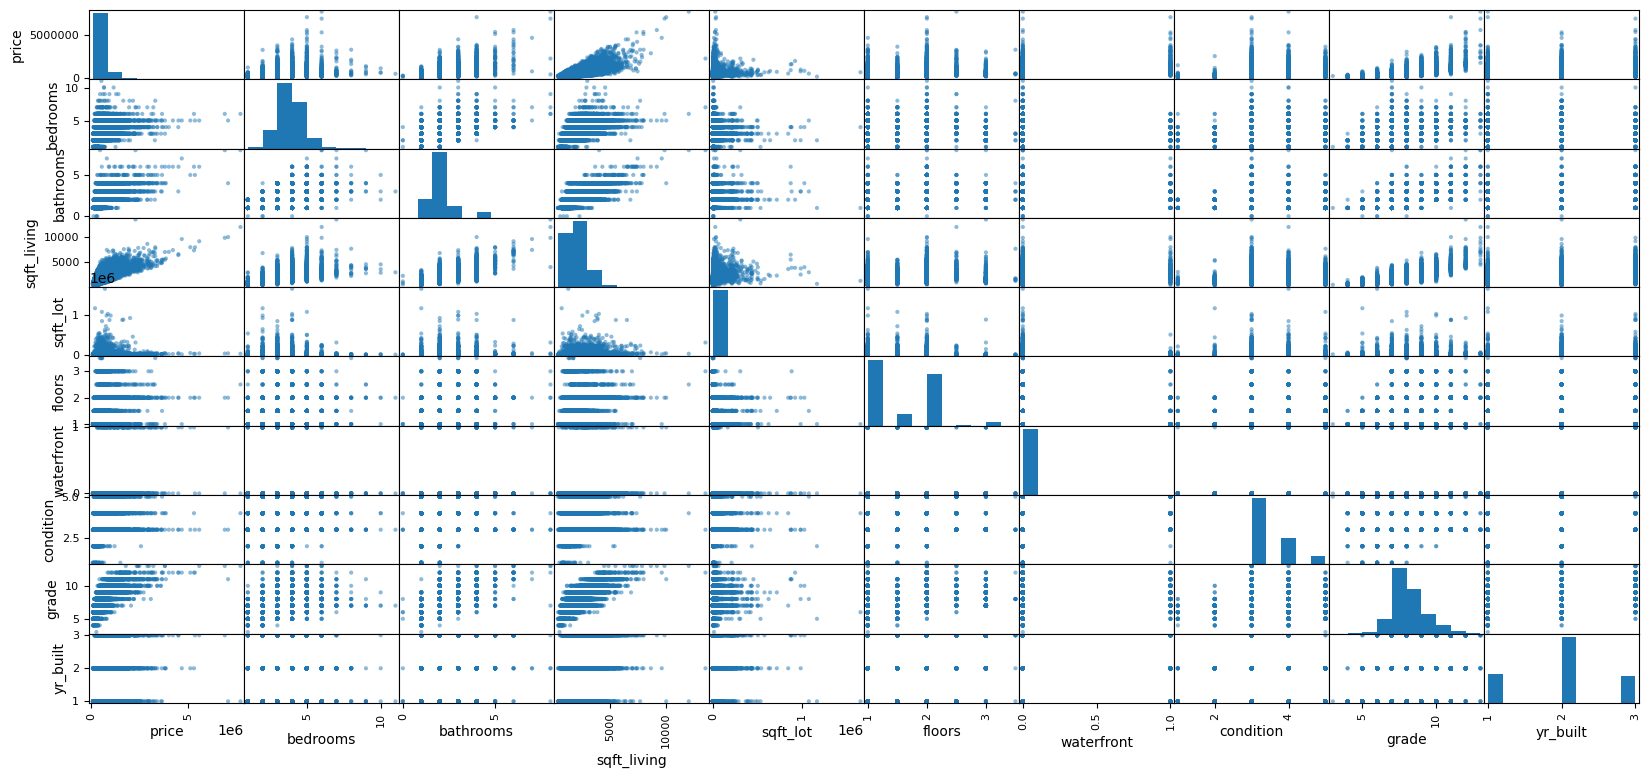

In [37]:
pd.plotting.scatter_matrix(base,figsize  = [20, 9]);
plt.show()

In [38]:
base.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,1.000000,0.316714,0.520011,0.701875,0.089111,0.256286,0.264898,0.034779,0.668020,0.064930
bedrooms,0.316714,1.000000,0.500827,0.594221,0.033638,0.183570,-0.002132,0.022743,0.367750,0.172919
bathrooms,0.520011,0.500827,1.000000,0.702395,0.089964,0.367305,0.064633,-0.070348,0.591285,0.358590
sqft_living,0.701875,0.594221,0.702395,1.000000,0.172586,0.352868,0.104737,-0.061677,0.762477,0.292306
sqft_lot,0.089111,0.033638,0.089964,0.172586,1.000000,-0.005561,0.021429,-0.009169,0.113656,0.016377
floors,0.256286,0.183570,0.367305,0.352868,-0.005561,1.000000,0.020578,-0.266859,0.458091,0.462616
waterfront,0.264898,-0.002132,0.064633,0.104737,0.021429,0.020578,1.000000,0.016608,0.082905,-0.025438
condition,0.034779,0.022743,-0.070348,-0.061677,-0.009169,-0.266859,0.016608,1.000000,-0.150508,-0.329565
grade,0.668020,0.367750,0.591285,0.762477,0.113656,0.458091,0.082905,-0.150508,1.000000,0.402141
yr_built,0.064930,0.172919,0.358590,0.292306,0.016377,0.462616,-0.025438,-0.329565,0.402141,1.000000


In [39]:
abs(base.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,True,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False
condition,False,False,False,False,False,False,False,True,False,False
grade,False,False,False,True,False,False,False,False,True,False
yr_built,False,False,False,False,False,False,False,False,False,True


In [40]:
df=base.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

In [41]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(grade, sqft_living)",0.762477


A correlation coefficient of 0.762477 between the variables "grade" and "sqft_living" indicates a strong positive linear relationship between these two independent variables.

# Iteration 2

**Addressing issues in Iteration 1 (First Model)**

**KDE**
Normal distribution with positive skew

- price
- sqft_living
- sqft_lot

**Linearity**
Variables that have a strong linear relationship with price.
* sqft_living

Variables that have a weak linear relationship with price.
* sqft_lot

**Normality**
- I believe the histogram exhibits a slight positive skew. And heavier tails than the normal distribution
- The residuals in the Q-Q plot appear to form an almost straight line. Largest values are larger (more extreme) than would be expected. Will check outliers as well

**Homoscedasticity: Constant Variance**
- The variance of the residuals increases with X, indicating a violation of the constant variance assumption.

**Multicollinearity**
- (grade, sqft_living) = 0.762477

 - We are going to drop sqft_lot as it shows weak linear relationship
 - To address multicollinearity, I will drop the 'grade' variable instead of 'sqft_living' because 'sqft_living' is more relatable to a regular person who may be interested in flipping houses than looking grade.
 - Address outliers
 - Log Transformation

In [42]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 7129300520 to 1523300157
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21420 non-null  float64
 1   bedrooms     21420 non-null  int64  
 2   bathrooms    21420 non-null  int64  
 3   sqft_living  21420 non-null  int64  
 4   sqft_lot     21420 non-null  int64  
 5   floors       21420 non-null  float64
 6   waterfront   21420 non-null  int64  
 7   condition    21420 non-null  int64  
 8   grade        21420 non-null  int64  
 9   yr_built     21420 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.8 MB


### Dealing with Outliers

In [43]:
# Reduce outliers by reducing data size to 3 standard deviations

filter_cols = ['sqft_living', 'sqft_lot', 'price']

df2 = base[~base[filter_cols].apply(lambda x: np.abs(x - x.mean()) > 3 * x.std()).any(axis=1)]

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20586 entries, 7129300520 to 1523300157
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        20586 non-null  float64
 1   bedrooms     20586 non-null  int64  
 2   bathrooms    20586 non-null  int64  
 3   sqft_living  20586 non-null  int64  
 4   sqft_lot     20586 non-null  int64  
 5   floors       20586 non-null  float64
 6   waterfront   20586 non-null  int64  
 7   condition    20586 non-null  int64  
 8   grade        20586 non-null  int64  
 9   yr_built     20586 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.7 MB


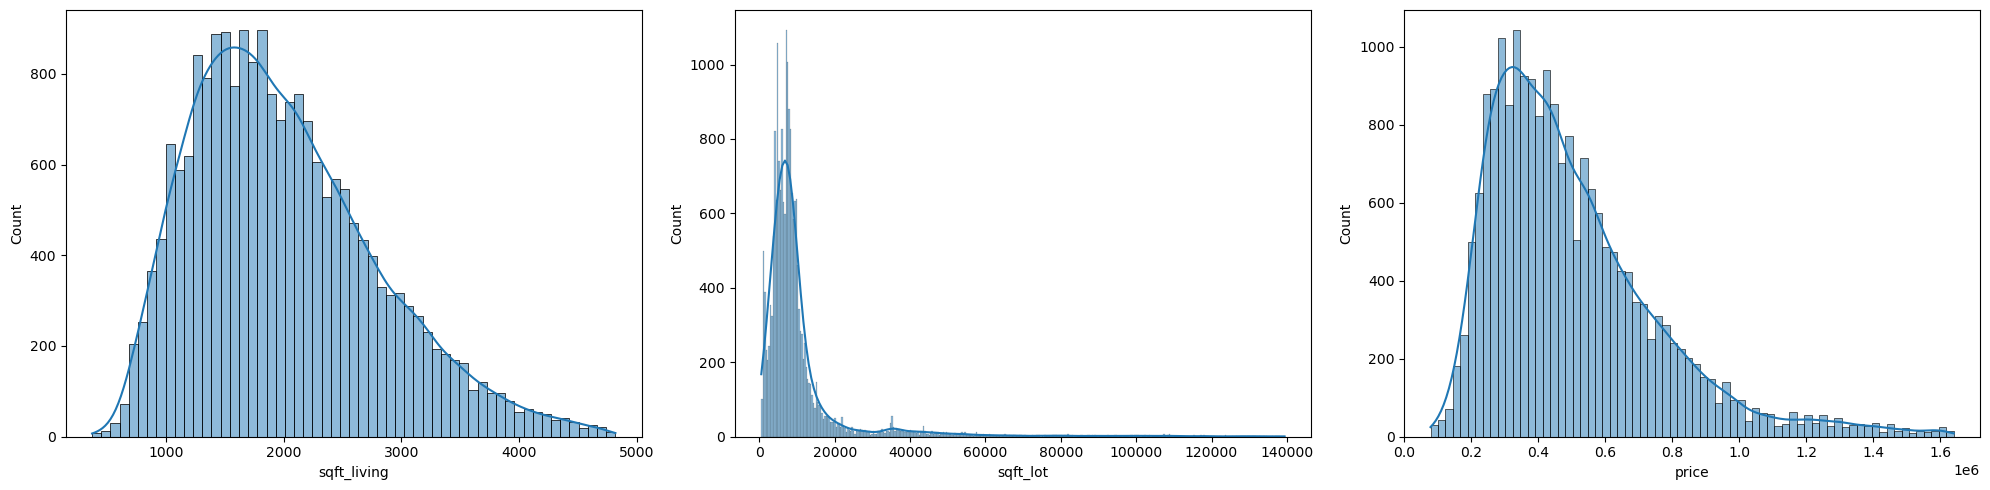

In [45]:
fig, axes = plt.subplots(1, 3, figsize = (20,5))
columns = ['sqft_living', 'sqft_lot','price']

sns.histplot(data=df2, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df2, x="sqft_lot", kde=True, ax=axes[1])
sns.histplot(data=df2, x="price", kde=True, ax=axes[2])

plt.tight_layout()
plt.show()

### Log Transformation

In [46]:
df2['sqft_living'] = np.log(df2['sqft_living'])
df2['sqft_lot'] = np.log(df2['sqft_lot'])
df2['price'] = np.log(df2['price'])

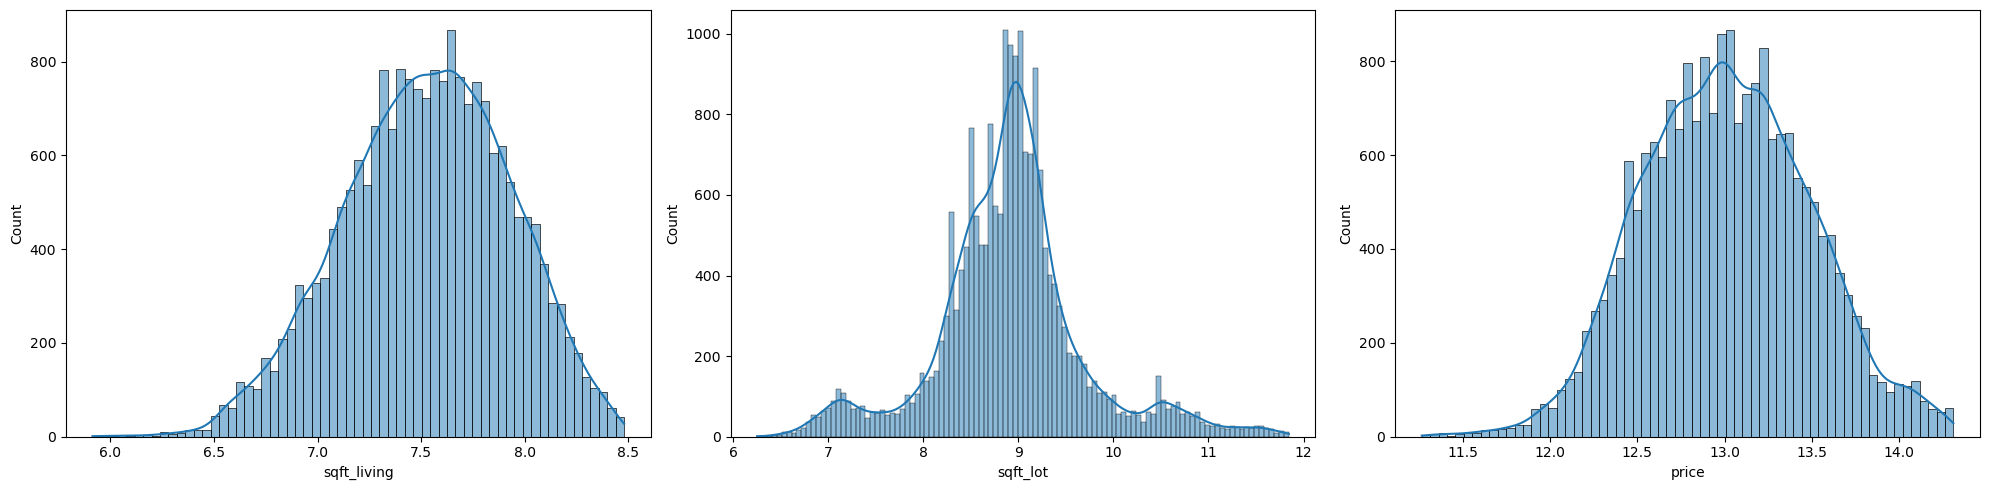

In [47]:
fig, axes = plt.subplots(1, 3, figsize = (20,5))
columns = ['sqft_living', 'sqft_lot','price']

sns.histplot(data=df2, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df2, x="sqft_lot", kde=True, ax=axes[1])
sns.histplot(data=df2, x="price", kde=True, ax=axes[2])

plt.tight_layout()
plt.show()

### Standardisation (Z-score Normalisation)

In [48]:
# normalize (subract mean and divide by std)
# def normalize(feature):
#     return (feature - feature.mean()) / feature.std()

df2['sqft_living'] = (df2['sqft_living'] - df2['sqft_living'].mean()) / df2['sqft_living'].std()
df2['sqft_lot'] = (df2['sqft_lot'] - df2['sqft_lot'].mean()) / df2['sqft_lot'].std()
df2['price'] = (df2['price'] - df2['price'].mean()) / df2['price'].std()

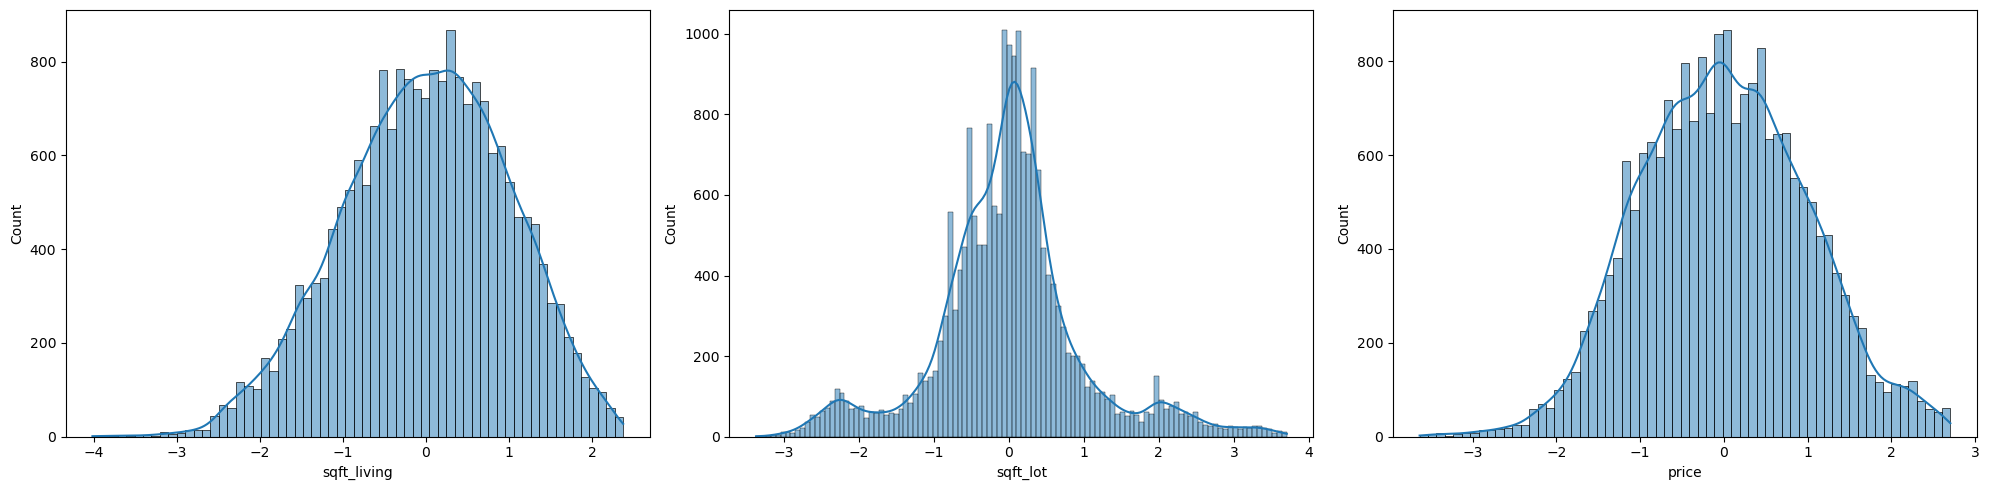

In [49]:
fig, axes = plt.subplots(1, 3, figsize = (20,5))
columns = ['sqft_living', 'sqft_lot','price']

sns.histplot(data=df2, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df2, x="sqft_lot", kde=True, ax=axes[1])
sns.histplot(data=df2, x="price", kde=True, ax=axes[2])

plt.tight_layout()
plt.show()

### Multicollinearity
Exclude grade and sqft_lot

In [50]:
ols_formula = 'price ~ sqft_living + C(bedrooms) + C(bathrooms) + C(floors) + C(waterfront) + C(condition) + C(yr_built)'
OLS = ols(formula = ols_formula, data = df2)
model2 = OLS.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     640.5
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:03:39   Log-Likelihood:                -22416.
No. Observations:               20586   AIC:                         4.489e+04
Df Residuals:                   20555   BIC:                         4.514e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.7745      0.388     -1.998      0.046      -1.534      -0.015
C(bedrooms)[T.2]      -0.1329      0.055     -2.420      0.016      -0.240      -0.025
C(bedrooms)[T.3]      -0.4191      0.055     -7.590      0.000      -0.527      -0.311
C(bedrooms)[T.4]      -0.5253      0.057     -9.239      0.000      -0.637      -0.414
C(bedrooms)[T.5]      -0.6160      0.060    -10.253      0.000      -0.734      -0.498
C(bedrooms)[T.6]      -0.8283      0.075    -11.070      0.000      -0.975      -0.682
C(bedrooms)[T.7]      -0.9680      0.150     -6.440      0.000      -1.263      -0.673
C(bedrooms)[T.8]      -1.0442      0.248     -4.217      0.000      -1.530      -0.559
C(bedrooms)[T.9]      -0.8961      0.328     -2.729      0.006      -1.540      -0.253
C(bedrooms)[T.10]     -0.5847      0.424     -1.379      0.168      -1.416       0.246
C(bedrooms)[T.11]     -1.4968      0.722     -2.073      0.038      -2.912      -0.082
C(bathrooms)[T.1]      0.8484      0.360      2.356      0.018       0.142       1.554
C(bathrooms)[T.2]      0.9228      0.360      2.561      0.010       0.217       1.629
C(bathrooms)[T.3]      1.1057      0.361      3.066      0.002       0.399       1.813
C(bathrooms)[T.4]      1.3364      0.361      3.698      0.000       0.628       2.045
C(bathrooms)[T.5]      1.0821      0.405      2.675      0.007       0.289       1.875
C(bathrooms)[T.6]      0.2864      0.817      0.351      0.726      -1.314       1.887
C(bathrooms)[T.8]      0.1549      0.867      0.179      0.858      -1.545       1.855
C(floors)[T.1.5]       0.0794      0.020      3.960      0.000       0.040       0.119
C(floors)[T.2.0]       0.1150      0.014      8.167      0.000       0.087       0.143
C(floors)[T.2.5]       0.4089      0.066      6.242      0.000       0.281       0.537
C(floors)[T.3.0]       0.6512      0.033     19.441      0.000       0.586       0.717
C(floors)[T.3.5]       0.6574      0.294      2.235      0.025       0.081       1.234
C(waterfront)[T.1]     0.9089      0.082     11.021      0.000       0.747       1.070
C(condition)[T.2]      0.0244      0.150      0.162      0.871      -0.270       0.319
C(condition)[T.3]      0.5192      0.139      3.733      0.000       0.247       0.792
C(condition)[T.4]      0.5976      0.139      4.293      0.000       0.325       0.870
C(condition)[T.5]      0.7206      0.140      5.147      0.000       0.446       0.995
C(yr_built)[T.2]      -0.4788      0.015    -32.548      0.000      -0.508      -0.450
C(yr_built)[T.3]      -0.5078      0.020    -25.586      0.000      -0.547      -0.469
sqft_living            0.7072      0.008     85.088      0.000       0.691       0.723
==============================================================================
Omnibus:                       25.974   Durbin

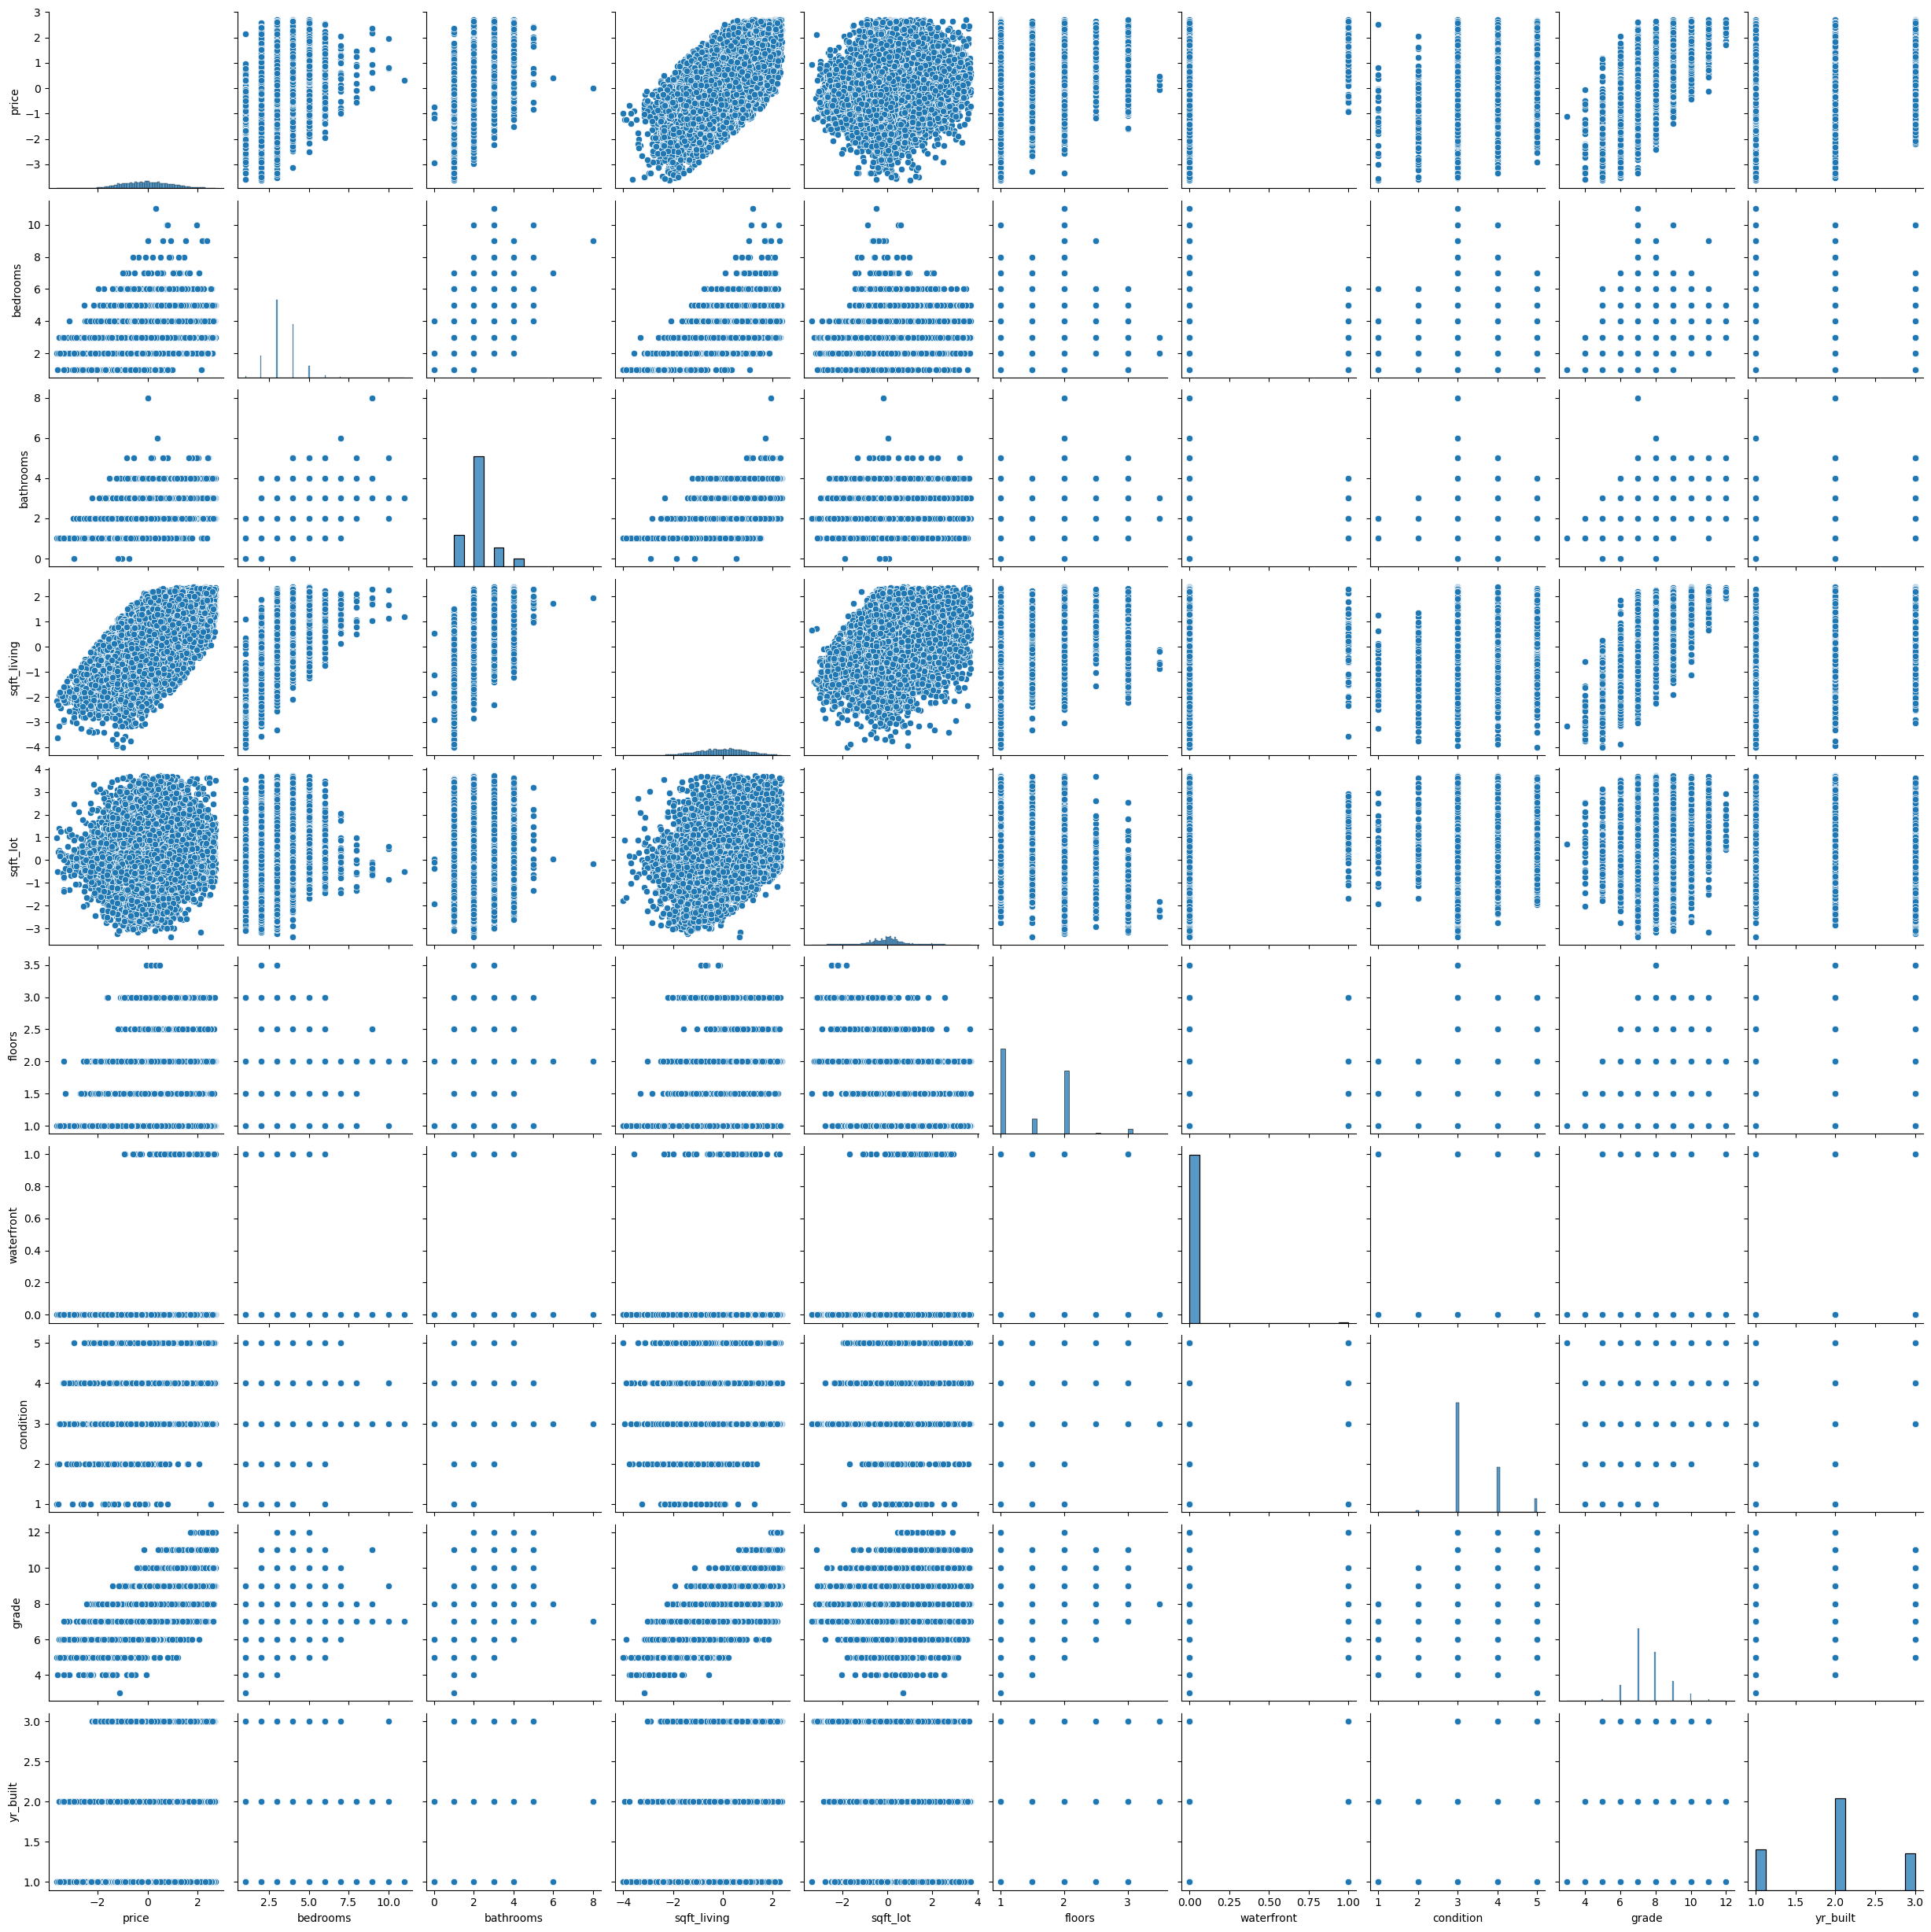

In [51]:
sns.pairplot(df2);

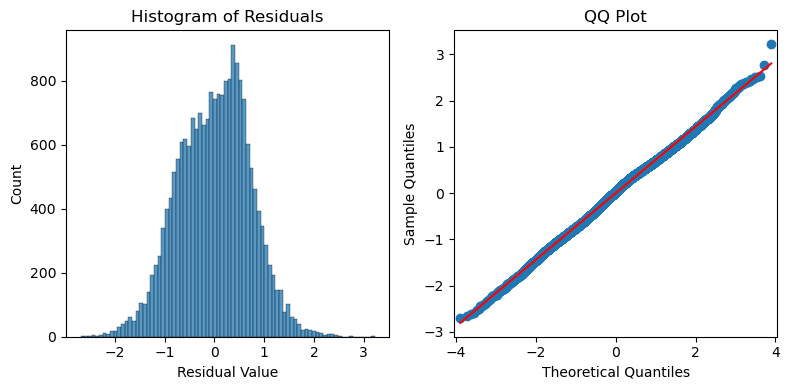

In [52]:
# Calculate the residuals.
residuals = model2.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("QQ Plot")

plt.tight_layout()
plt.show()

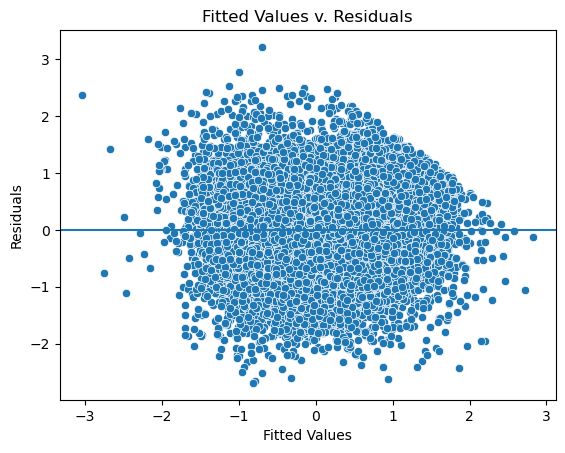

In [53]:
fig = sns.scatterplot(x = model2.fittedvalues, y = model2.resid)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)

plt.show()